***
***
# Intro to Neural Networks

Handwritten Digits Recognization

***
***

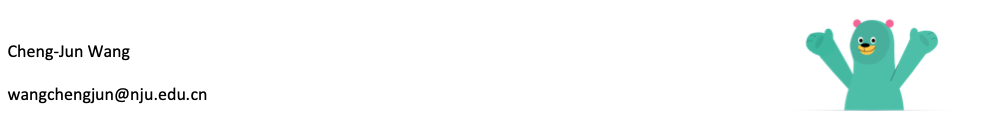



**上课前请务必看完这两个视频以大致神经网络，否则会迷失于本课中的技术细节！！！！**
【一共约40分钟】

1. https://www.bilibili.com/video/BV1bx411M7Zx 

2. https://www.bilibili.com/video/BV1Ux411j7ri

- Deep Learning http://www.deeplearningbook.org
    - An MIT Press book by Ian Goodfellow, Yoshua Bengio and Aaron Courville

- Neural Networks and Deep Learning http://neuralnetworksanddeeplearning.com/index.html

    - A free online book explaining the core ideas behind artificial neural networks and deep learning. [Code](https://github.com/mnielsen/neural-networks-and-deep-learning). By [Michael Nielsen](http://michaelnielsen.org/) / Dec 2017



<img src = './img/neuralnetwork/neuron2.png' width = 700 align = 'left'>

<img src = './img/neuralnetwork/synapse.jpg' width = 150 align = 'right'>
**The Neuron: A Biological Information Processor**

- dentrites -   the receivers
- soma -   neuron cell body (sums input signals)
- axon  -   the transmitter
- synapse 突触 -   point of transmission

neuron activates after a certain threshold is met

Learning occurs via electro-chemical changes in effectiveness of synaptic junction.  


<img src = "./img/neuralnetwork/layer.png"  width=200 align = 'right'>

**An Artificial Neuron: The Perceptron simulated on hardware or by software**
- input connections -   the receivers
- node simulates neuron body
- output connection -   the transmitter
- **activation function** employs a threshold or bias
- connection weights act as synaptic junctions (突触)

> Learning occurs via changes in value of the connection weights. 


<img src = "./img/neuralnetwork/layer.png"  width=200 align = 'right'>

Neural Networks consist of the following components

- An **input layer**, **x**
- An arbitrary amount of **hidden layers**
- An **output layer**, **ŷ**
- A set of **weights** and **biases** between each layer, **W and b**
- A choice of **activation function** for each hidden layer, **σ**. 
    - e.g., Sigmoid activation function.

 

ANNs (artificial neural network) incorporate the two fundamental components of biological neural nets:


- Neurones (nodes)
- Synapses (weights)

<img src = './img/neuralnetwork/net2.png' width = 400>

Process of forwarding (transmission of 'neural signal')

In [83]:
1*0.25 + 0.5*(-1.5)

-0.5

Then there will be a final output at last: this will be our result

Each iteration of the training process consists of the following steps:

1. Calculating the predicted output **ŷ**, known as `feedforward`
1. Updating the weights and biases, known as `backpropagation`

<img src = "./img/neuralnetwork/sequence.png"  width=1000>

**activation function** for each hidden layer, **σ**. 

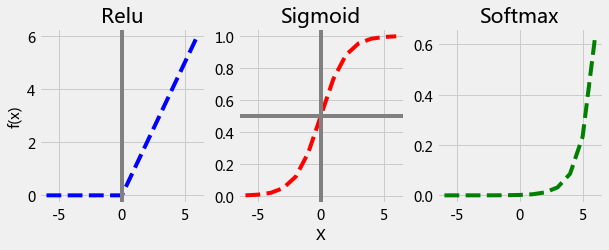

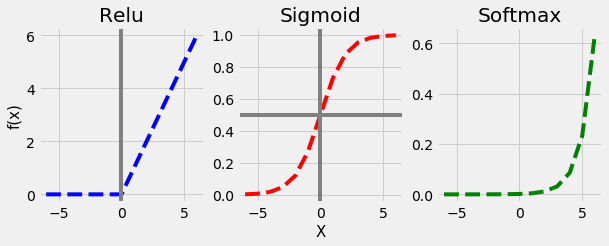

In [84]:
# activation function
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-6, 7)
relu_x = [i if i > 0 else 0 for i in x  ]
softmax_x = np.exp(x) / np.sum(np.exp(x))
sigmoid_x = np.exp(x)/(1 + np.exp(x))

plt.style.use("fivethirtyeight")

fig = plt.figure(figsize=(9, 3)) 
fig.add_subplot(1, 3, 1)
plt.plot(x, relu_x, 'b--')
plt.axvline(x=0,ls="-",c="gray")
plt.ylabel('f(x)', fontsize = 15)
plt.title('Relu')

fig.add_subplot(1, 3, 2)
plt.plot(x, sigmoid_x, 'r--')
plt.axvline(x=0,ls="-",c="gray")
plt.axhline(y=0.5,ls="-",c="gray")
plt.xlabel('X', fontsize = 15)
plt.title('Sigmoid')

fig.add_subplot(1, 3, 3)
plt.plot(x, softmax_x, 'g--')
plt.title('Softmax')

plt.show()


The output **ŷ** of a simple 2-layer Neural Network is:

$$ \widehat{y} = \sigma (w_2 z + b_2) = \sigma(w_2 \sigma(w_1 x + b_1) + b_2)$$


想一想：Why we need those functions? Can't we just use combination of linear functions?
-- de-linearize the whole model

**Loss or Cost function**

\begin{eqnarray}  C(w,b) \equiv
  \frac{1}{2n} \sum_x \| y(x) - \widehat{y} \|^2.
\tag{6}\end{eqnarray}

- $\frac{1}{2}$ is used for the convenience of derivate.
- w denotes the collection of all weights in the network, 
- b all the biases, 
- n is the total number of training inputs, 
- $\widehat{y}$  is the vector of outputs from the network when x is input, and the sum is over all training inputs, x. 


<img src= 'img/neuralnetwork/loss.png' width= "200px">

## **Gradient Descent**

<img src ='./img/neuralnetwork/gradient.png' width = 600 align = 'center'>


- Gradient descent 遍历全部数据集算一次损失函数,速度慢，;
- stochastic gradient descent 速度比较快，但收敛性能不太好。
- mini-batch gradient decent 把数据分为若干个批，按批来更新参数，一批中的一组数据共同决定了本次梯度的方向，减少了随机性。


Chain rule for calculating derivative of the **loss function** with respect to the weights. 

Note that for simplicity, we have only displayed the partial derivative assuming a 1-layer Neural Network.

We simply denotes error as $E = \sum_{j=1}^{n} \frac{1}{2} (y_j - \widehat{y}_j)^2$

Given $t_j$ is a constant, we have: $\frac{\partial E}{\partial \widehat{y}_{j}} = y_j - \widehat{y} _j$

Apply the chain rule for the differentiation:

$\frac{\partial E}{\partial w_{ij}} = \frac{\partial E}{\partial \widehat{y}_{j}} \cdot \frac{\partial \widehat{y}_j}{\partial w_{ij}} = (y_j - \widehat{y}_j) \cdot \frac{\partial \widehat{y}_j}{\partial w_{ij}} $


Further, we often use the `sigmoid function` as the activation function $\sigma(x) = \frac{1}{1+e^{-x}}$

Given the deprivative: ![](./img/neuralnetwork/ex.gif)

And it is easy to differentiate: $\frac{\partial \sigma(x)}{\partial x} = \sigma(x) \cdot (1 - \sigma(x))$



Given $\widehat{y}_j = \sigma(\sum_{i=1}^{m} w_{ij}x_i)$, we have

$\frac{\partial E}{\partial w_{ij}} = (y_j - \widehat{y}_j) \cdot \frac{\partial }{\partial w_{ij}}\sigma(\sum_{i=1}^{m} w_{ij}x_i)$



$\frac{\partial E}{\partial w_{ij}} = (y_j - \widehat{y}_j) \cdot  \sigma(\sum_{i=1}^{m} w_{ij}x_i) \cdot (1 -  \sigma(\sum_{i=1}^{m} w_{ij}x_i)) \frac{\partial }{\partial w_{ij}} \sum_{i=1}^{m} w_{ij}x_i$

$\frac{\partial E}{\partial w_{ij}} = (y_j - \widehat{y}_j) \cdot  \sigma(\sum_{i=1}^{m} w_{ij}x_i) \cdot (1 -  \sigma(\sum_{i=1}^{m} w_{ij}x_i)) \cdot x_i$

Adding the learning rate:

$$\frac{\partial E}{\partial w_{ij}} = error * x_i * derivativeofsigmoid * learningrate$$

How to update the weights during backpropagation?

$$w_{i,j}^{'} = w_{i,j} - error * x_i * derivate of sigmoid * learning rate$$

Note: $\eta$ is the learning rate.

## **Mathematics behind Gradient Descent**

A simple mathematical intuition behind one of the commonly used optimisation algorithms in Machine Learning.

[Read More](https://mp.weixin.qq.com/s/VvdbyvUDIGUiIct8k0trvQ)

## Demos of Backpropagation

Source: http://home.agh.edu.pl/~vlsi/AI/backp_t_en/backprop.html


![](img/neuralnetwork/img01b.gif)

![](img/neuralnetwork/img14.gif)

- **df(e)/de** represents derivative of neuron activation function
- **$\sigma_1$** is the error of the hidden neuron 1

<img src='./img/neuralnetwork/backpropagation2.png' width = '400' align = 'right'>
The error is the difference between the target and the actual output:
$e_i = \frac{1}{2}  ( t_i - o_i ) ^ 2$

- $e_1 = t_1 - o_1 = 1 - 0.92 = 0.08$

Depending on this error, we have to change the weights accordingly. 
- we can calculate the fraction of the error e1 in w11 as:
- $e_1 \cdot \frac{w_{11}}{\sum_{i=1}^{4} w_{i1}} = 0.08 \cdot \frac{0.6}{0.6 + 0.4 + 0.1 + 0.2} = 0.037$

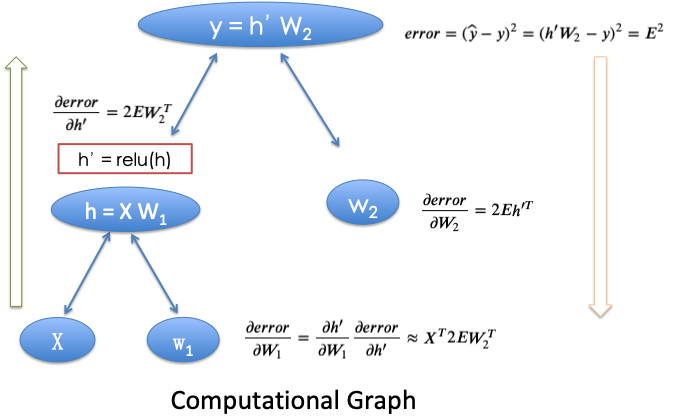

if time permits, let's go on. ✅

# The 'Hello World' for NN: Handwritten Digit Recognition
https://github.com/lingfeiwu/people2vec

<img src = "./img/neuralnetwork/digits.png"  width=200 align = 'left'>

<img src = "./img/neuralnetwork/net.jpeg"  width=400 align = 'right'>

**Each image has 8*8 = 64 pixels**
- input = 64
    - [0, 0, 1, 0, ..., 0]
- batch size = 100
    - split data into 100 batches. 
- hidden neurons = 50
- output = 10
- using relu activation function


<img src = "./img/neuralnetwork/tensor2.jpeg"  width=400 align = 'right'>

- Set batch_size = 100 images
- Given each image 64 pixels
    - input_matrix = 100*64
- Set #neurons= 50
    - w1 = 64*50
    - hidden_matrix = 100*50
- Given #output = 10
    - w2 = 50*10
    - output = 100*10

We will first build a solid understanding with Numpy and then see how to conveniently build a model using specialized neural network package: PyTorch

In [85]:
# Author: Robert Guthrie
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import sys
import matplotlib.cm as cm
import networkx as nx
import numpy as np
import pylab as plt
import matplotlib as mpl
from collections import defaultdict
from matplotlib.collections import LineCollection
%matplotlib inline

from sklearn import datasets
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.decomposition import PCA

## 1. Loading data 

In [86]:
#basic functions
# softmax
def softmax(x):
    e_x = np.exp(x - np.max(x)) # to avoid inf
    return e_x / e_x.sum(axis=0)

def softmaxByRow(x):
    e_x = np.exp(x - x.max(axis=1, keepdims=True))
    return e_x / e_x.sum(axis=1, keepdims=True)

# flush print
def flushPrint(d):
    sys.stdout.write('\r')
    sys.stdout.write(str(d))
    sys.stdout.flush()

In [87]:
# the limits of np.exp
np.exp(1000)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


inf

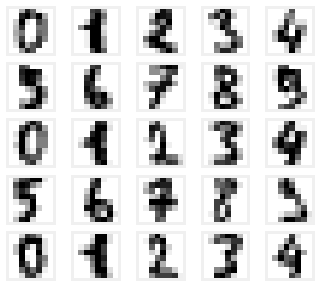

In [88]:
# load data
digits = datasets.load_digits()
# display data
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

## 2. Neural Network (using numpy)

In [89]:
# prepare training sets
N, H, D_in, D_out = 100, 50, 64, 10 # batch size, hidden, input, output dimension
k = 0.9 # the fraction traning data
learning_rate = 1e-6
L = len(digits.data)
l = int(L*k)

In [90]:
L, l

(1797, 1617)

In [91]:
Batches = {}
M = 200 # number of batches
for j in range(M):
    index=list(np.random.randint(l, size=N)) # randomly sample N data points
    y = np.zeros((N, 10))
    y[np.arange(N), list(digits.target[index])] = 1
    x=digits.data[index]
    Batches[j]=[x,y]
    

In [92]:
j = 7
x, y = Batches[j]

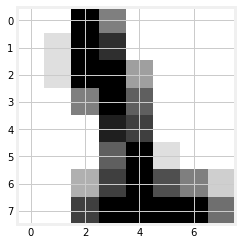

In [93]:
plt.imshow(x[5].reshape(8, 8), cmap = 'binary')

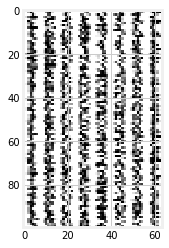

In [94]:
plt.imshow(x, cmap = 'binary') # 100*64
plt.show()

In [95]:
y.shape

(100, 10)

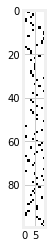

In [96]:
plt.imshow(y, cmap = 'binary') # 100*10
plt.show()

## 3. Randomly initializing weights

In [97]:
w1 = np.random.randn(D_in, H)/H 
w2 = np.random.randn(H, D_out)/H
w1c = w1.copy() # for comprision in viz
w2c = w2.copy()

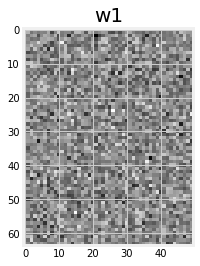

In [98]:
plt.imshow(w1, cmap = 'binary') # 64*50
plt.title('w1', fontsize = 20)
plt.show()

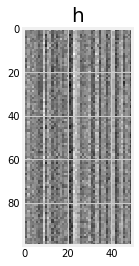

In [99]:
plt.imshow(x.dot(w1), cmap = 'binary') # 100*50
plt.title('h', fontsize = 20)
plt.show()

## 4. Forwarding

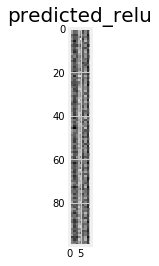

In [100]:
h = x.dot(w1)
# relu activation
h_relu = np.maximum(h, 0)
y_pred = h_relu.dot(w2)
plt.imshow(y_pred, cmap = 'binary') # 100*10
plt.title('predicted_relu', fontsize = 20)
plt.show()

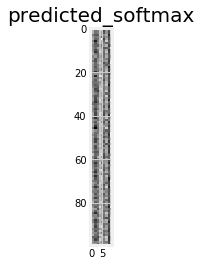

In [101]:
# softmax
y_predS=softmaxByRow(y_pred)
plt.imshow(y_predS, cmap = 'binary') # 100*10
plt.title('predicted_softmax', fontsize = 20)
plt.show()

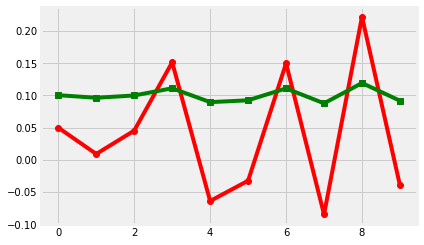

In [102]:
plt.plot(y_pred[0], 'r-o')
plt.plot(y_predS[0], 'g-s')
plt.show()

## 5. Loss & Backpropagation

In [103]:
Loss=defaultdict(lambda:[])
loss = np.square(y_predS - y).sum() # squared error loss 
Loss[j].append([3,loss])

In [104]:
Loss.items()

dict_items([(7, [[3, 90.1335860391574]])])

**Our goal** in training is to find the best set of weights and biases that minimizes the loss function.

- In order to know the appropriate amount to adjust the weights and biases by, 
    - we need to know **the derivative of the loss function** 
        - with respect to the weights and biases.




$$error = ( \widehat{y} - y)^2 = (h'W_2-y)^2 = E^2$$

$\frac{\partial error}{\partial h'} = 2E W_2^T$

$\frac{\partial error}{\partial W_2} = 2E h'^T$

$\frac{\partial error}{\partial W_1} = \frac{\partial h'}{\partial W_1} \frac{\partial error}{\partial h'} \approx  X^T 2 E W_2^T$

Given $h = X W_1$, therefore $\frac{\partial h}{\partial W_1} = X$

$h' = relu(h)$, that is to say, $h = h'$ when h >=0.


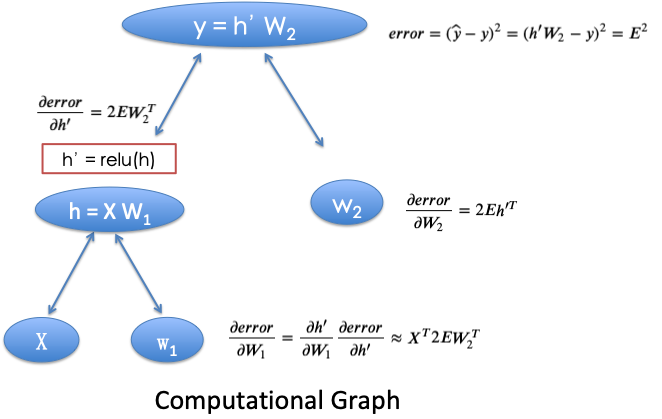

In [105]:
# Backprop 反向计算导数以更新 weight
grad_y_pred = 2.0 * (y_predS - y)
grad_w2 = h_relu.T.dot(grad_y_pred)
grad_h_relu = grad_y_pred.dot(w2.T)
grad_h = grad_h_relu.copy()
grad_h[h < 0] = 0 # ReLu activation function 的特点: only activates when input > 0
grad_w1 = x.T.dot(grad_h)
# Update weights
w1 -= learning_rate * grad_w1 # 是负号因为gradient给出上升最快的方向，但是我们要下降
w2 -= learning_rate * grad_w2

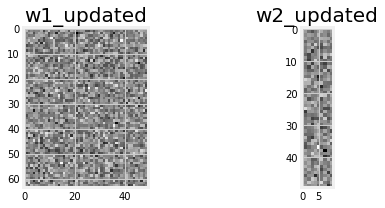

In [106]:
fig = plt.figure(figsize=(8, 3))
ax=fig.add_subplot(121)
plt.imshow(w1, cmap = 'binary') # 64*50
plt.title('w1_updated', fontsize = 20)
ax=fig.add_subplot(122)
plt.imshow(w2, cmap = 'binary') # 64*50
plt.title('w2_updated', fontsize = 20)
plt.tight_layout()

## 6. Put Together

In [107]:
# 重新 set weights 
w1 = np.random.randn(D_in, H)/H 
w2 = np.random.randn(H, D_out)/H
w1c = w1.copy() # for comprision in viz
w2c = w2.copy()
Loss=defaultdict(lambda:[])
# traning 通过循环反复训练
for j in Batches:
    flushPrint(j)
    x,y=Batches[j]
    for t in range(500):# repeated use of the same batch
        # Forward
        h = x.dot(w1)
        h_relu = np.maximum(h, 0)
        y_pred = h_relu.dot(w2)
        y_predS=softmaxByRow(y_pred)
        # loss
        loss = np.square(y_predS - y).sum()
        Loss[j].append([t,loss])
        # Backprop 
        grad_y_pred = 2.0 * (y_predS - y)
        grad_w2 = h_relu.T.dot(grad_y_pred)
        grad_h_relu = grad_y_pred.dot(w2.T)
        grad_h = grad_h_relu.copy()
        grad_h[h < 0] = 0
        grad_w1 = x.T.dot(grad_h)
        # Update weights
        w1 -= learning_rate * grad_w1
        w2 -= learning_rate * grad_w2

199

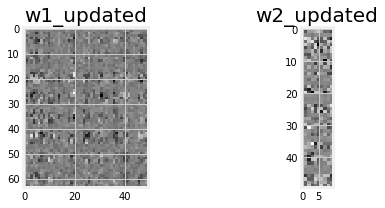

In [108]:
fig = plt.figure(figsize=(8, 3))
ax=fig.add_subplot(121)
plt.imshow(w1, cmap = 'binary') # 64*50
plt.title('w1_updated', fontsize = 20)
ax=fig.add_subplot(122)
plt.imshow(w2, cmap = 'binary') # 64*50
plt.title('w2_updated', fontsize = 20)
plt.tight_layout()

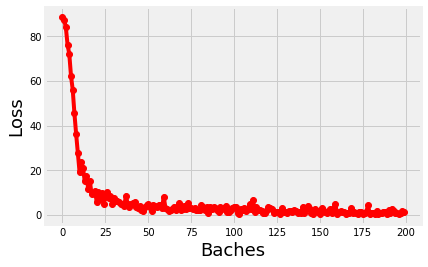

In [109]:
# 训练误差在不断下降
loss = [(k, np.mean([j for i, j in Loss[k]])) for k in Loss]
t, loss = np.array(loss).T
plt.plot(t, loss, 'r-o')
plt.xlabel('Baches',fontsize=18)
plt.ylabel('Loss',fontsize=18)
#plt.yscale('log')
plt.show()

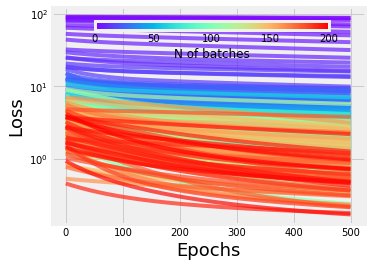

In [110]:
# Dispaly loss decreasing
fig = plt.figure(figsize=(5, 4))
cmap = cm.get_cmap('rainbow',M)
for i in Loss:
    epochs,loss=zip(*sorted(Loss[i]))
    plt.plot(epochs,loss,color=cmap(i),alpha=0.7)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.yscale('log')
ax1 = fig.add_axes([0.2, 0.8, 0.65, 0.03])
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=mpl.colors.Normalize(vmin=0, vmax=M),
                                orientation='horizontal')
cb1.set_label('N of batches')

In [111]:
# Test
TestData=digits.data[-(L-l):] # locate TestData 
PredictData=np.maximum(TestData.dot(w1),0).dot(w2) # forward in the network to get prediction 
compare=np.argmax(PredictData, axis=1)-digits.target[-(L-l):] 
# np.argmax: 选择可能性最大的那个数字; compare predicted value和实际正确值
Accuracy=list(compare).count(0)/float(len(compare)) # 计算正确的比例
Accuracy

0.9222222222222223

# Neural Network (using PyTorch)

In [112]:
# initialize
dtype = torch.FloatTensor
w1 = Variable(torch.randn(D_in, H).type(dtype)/H, requires_grad=True) # requires_grad 可以让torch自动算gradient
w2 = Variable(torch.randn(H, D_out).type(dtype)/H, requires_grad=True)
learning_rate = 1e-6
Loss=defaultdict(lambda:[])

In [114]:
# train
for j in Batches:
    flushPrint(j)
    x,y=Batches[j] # 每次换一拨新的训练材料
    x = Variable(torch.from_numpy(x).type(dtype), requires_grad=False)  
    y = Variable(torch.from_numpy(y).type(dtype), requires_grad=False)
    # convert Numpy object to Torch Variable
    for t in range(500):
        y_pred = x.mm(w1).clamp(min=0).mm(w2) 
        # forward; clamp: mimic relu; mm: matrix mutiplication
        softmax = nn.Softmax(dim=1)
        y_soft=softmax(y_pred)
        # convert arbitrary large predicted value to 0~1 'probability'
        loss = (y_soft - y).pow(2).sum() 
        Loss[j].append([t,loss.data.item()]) # track loss change 
        loss.backward() # automatic differentiation -- using the technique of autograd
        w1.data -= learning_rate * w1.grad.data
        w2.data -= learning_rate * w2.grad.data
        w1.grad.data.zero_()
        w2.grad.data.zero_()

199

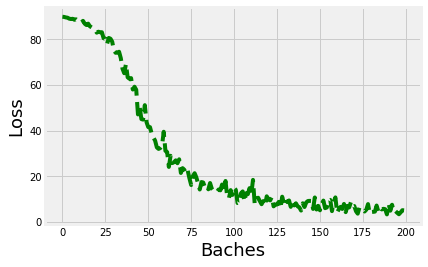

In [115]:
loss = [(k, np.mean([j for i, j in Loss[k]])) for k in Loss]
t, loss = np.array(loss).T
plt.plot(t, loss, 'g--')
plt.xlabel('Baches',fontsize=18)
plt.ylabel('Loss',fontsize=18)
#plt.yscale('log')
plt.show()

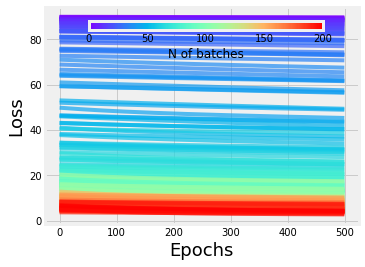

In [116]:
# Dispaly loss decreasing
fig = plt.figure(figsize=(5, 4))
cmap = cm.get_cmap('rainbow',M)
for i in Loss:
    epochs,loss=zip(*sorted(Loss[i]))
    plt.plot(epochs,loss,color=cmap(i),alpha=0.7)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Loss',fontsize=18)
ax1 = fig.add_axes([0.2, 0.8, 0.65, 0.03])
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=mpl.colors.Normalize(vmin=0, vmax=M),
                                orientation='horizontal')
cb1.set_label('N of batches')

In [117]:
TestData=digits.data[-(L-l):]
xTest = Variable(torch.from_numpy(TestData).type(dtype), requires_grad=False)
PredictData = xTest.mm(w1).clamp(min=0).mm(w2)
compare=np.argmax(PredictData.data.numpy(),axis=1)-digits.target[-(L-l):]
Accuracy=list(compare).count(0)/float(len(compare))
Accuracy

0.9277777777777778

- https://github.com/lingfeiwu/people2vec
- http://neuralnetworksanddeeplearning.com/chap1.html
- https://en.wikipedia.org/wiki/Backpropagation
- http://cs231n.github.io/neural-networks-case-study/
- https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

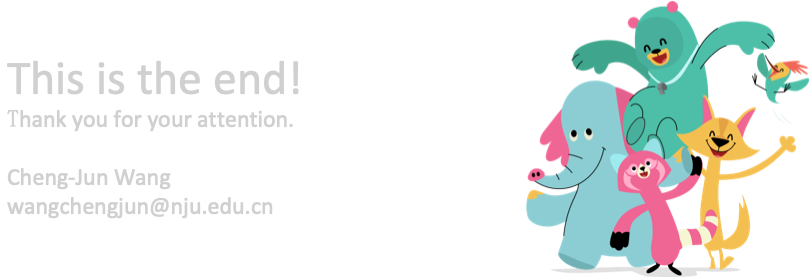